In [1]:
import os 
import pickle
import lmdb
from functools import lru_cache

class LMDBDataset:
    def __init__(self, db_path, split="train"):
        self.db_path = os.path.join(db_path, split+".lmdb")
        assert os.path.isfile(self.db_path), "{} not found".format(self.db_path)
        env = self.connect_db(self.db_path)
        self.dataset_size = int(env.begin().get("size".encode("ascii")).decode("ascii")) 

    def connect_db(self, lmdb_path, save_to_self=False):
        env = lmdb.open(
            lmdb_path,
            subdir=False,
            readonly=True,
            lock=False,
            readahead=False,
            meminit=False,
            max_readers=256,
        )
        if not save_to_self:
            return env
        else:
            self.env = env

    def __len__(self):
        return self.dataset_size

    @lru_cache(maxsize=16)
    def __getitem__(self, idx):
        if not hasattr(self, "env"):
            self.connect_db(self.db_path, save_to_self=True)
        datapoint_pickled = self.env.begin().get(f"{idx}".encode("ascii"))
        data = pickle.loads(datapoint_pickled)
        return data


dataset = LMDBDataset('data/graphs/PUBCHEM', split='train')
print(len(dataset))

82297


In [2]:
dataset[0]

{'atom_atomic_nums': array([5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 7, 6, 5, 7, 6], dtype=uint8),
 'edge_index': array([[ 0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  3,  6,  6,  7,  6,  8,
          8,  9,  9, 10, 10, 11, 10, 12, 12, 13, 13, 14, 13, 15,  5,  0,
         15,  9],
        [ 1,  0,  2,  1,  3,  2,  4,  3,  5,  4,  6,  3,  7,  6,  8,  6,
          9,  8, 10,  9, 11, 10, 12, 10, 13, 12, 14, 13, 15, 13,  0,  5,
          9, 15]], dtype=uint8),
 'edge_attr': array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 0, 0], dtype=uint8)}

In [3]:
print(len(dataset))

82297


In [4]:
all_atomic_nums = []
all_sizes = []
for i in range(len(dataset)):
    try:
        graph, target = dataset[i]
    except:
        graph = dataset[i]
    all_atomic_nums.extend(graph['atom_atomic_nums'].tolist())
    all_sizes.append(graph['atom_atomic_nums'].shape[0])

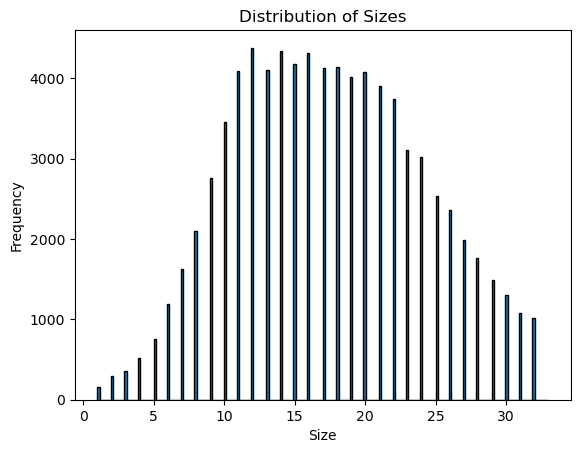

Max size: 33
Min size: 1
Average size: 17.409528901418035


In [5]:
import matplotlib.pyplot as plt

plt.hist(all_sizes, bins=200, edgecolor='black')
plt.title('Distribution of Sizes')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

print('Max size:', max(all_sizes))
print('Min size:', min(all_sizes))
print('Average size:', sum(all_sizes) / len(all_sizes))

In [6]:
unique = set(all_atomic_nums)
print(len(unique))
for u in unique:
    print(u, all_atomic_nums.count(u))

101
0 226
1 1
2 90
3 41
4 251
5 1052256
6 115474
7 185047
8 11475
9 1
10 2009
11 121
12 173
13 1338
14 3287
15 16970
16 31562
17 1
18 475
19 189
20 8
21 44
22 39
23 105
24 65
25 153
26 86
27 64
28 130
29 126
30 18
31 53
32 391
33 192
34 5468
35 3
36 24
37 36
38 12
39 32
40 22
41 31
42 9
43 9
44 10
45 30
46 51
47 40
48 16
49 296
50 116
51 64
52 2989
53 3
54 25
55 50
56 14
57 20
58 13
59 11
60 1
61 11
62 14
63 12
64 13
65 13
66 16
67 10
68 12
69 15
70 11
71 6
72 19
73 18
74 14
75 4
76 15
77 56
78 23
79 329
80 29
81 142
82 44
83 4
85 3
86 1
87 3
88 1
89 12
90 1
91 33
92 1
93 3
94 1
95 1
96 1
97 1
98 1
99 1
100 1
101 1
